<a href="https://colab.research.google.com/github/anthonyramos-star/Processamento-de-imagens-de-computa-o-gr-fica---E02/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Nenhuma imagem carregada. Comece pela Opção 1.
-----------------------------------------------------
 1.Carregar/Processar Nova Imagem Principal 
 2.Ver Medidas Globais (Entropia, Variância, etc.) 
 3.Ver Classificação de Complexidade 
 4.Exibir Mapa de Padrões (Convolução) 
 5.Exibir Mapa de Textura Densa (Entropia Local) 
 6.Comparar com metricas globais de segunda imagem 
 7.Análise de Tecido 
 8.Análise de Tumor 
 9.Análise de Complexidade (Caos/Suavidade) 
 10.Mapa de contraste local 
 11.Converter para HSV 
 12.Equalizar Histograma 
 13.Binarizar imagem 
 14.Detectar bordas com canny 
 15.Detectar formas geométricas 
 16.Gerar relatório em txt
0.Sair

Escolha uma opção: 1
Cole o CAMINHO da imagem principal: /content/cerebroTumor.jpg

--- Análise da Imagem Principal Concluída ---
 > Classificação: Baixa Complexidade
 > Medidas: Entropia=4.98, Variância=1702.58, Homogeneidade=0.67

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem

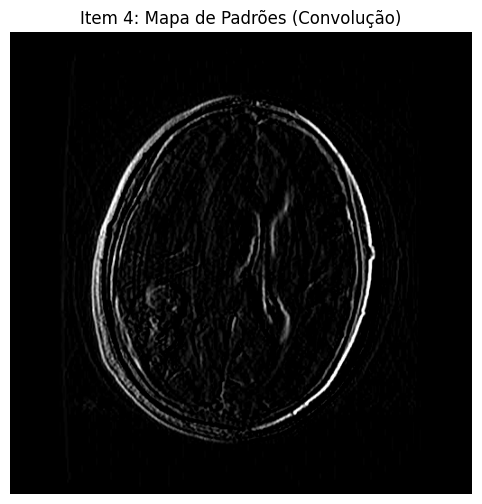


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1.Carregar/Processar Nova Imagem Principal 
 2.Ver Medidas Globais (Entropia, Variância, etc.) 
 3.Ver Classificação de Complexidade 
 4.Exibir Mapa de Padrões (Convolução) 
 5.Exibir Mapa de Textura Densa (Entropia Local) 
 6.Comparar com metricas globais de segunda imagem 
 7.Análise de Tecido 
 8.Análise de Tumor 
 9.Análise de Complexidade (Caos/Suavidade) 
 10.Mapa de contraste local 
 11.Converter para HSV 
 12.Equalizar Histograma 
 13.Binarizar imagem 
 14.Detectar bordas com canny 
 15.Detectar formas geométricas 
 16.Gerar relatório em txt
0.Sair

Escolha uma opção: 5


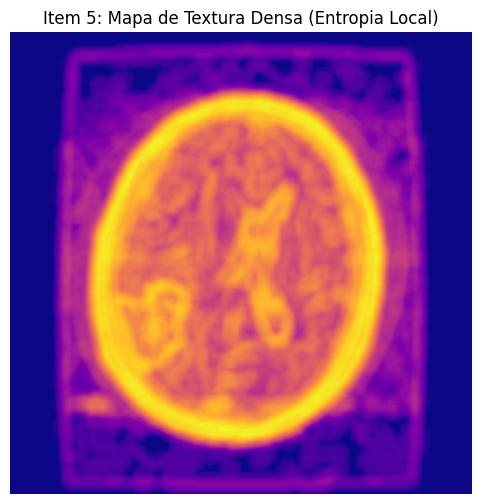


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1.Carregar/Processar Nova Imagem Principal 
 2.Ver Medidas Globais (Entropia, Variância, etc.) 
 3.Ver Classificação de Complexidade 
 4.Exibir Mapa de Padrões (Convolução) 
 5.Exibir Mapa de Textura Densa (Entropia Local) 
 6.Comparar com metricas globais de segunda imagem 
 7.Análise de Tecido 
 8.Análise de Tumor 
 9.Análise de Complexidade (Caos/Suavidade) 
 10.Mapa de contraste local 
 11.Converter para HSV 
 12.Equalizar Histograma 
 13.Binarizar imagem 
 14.Detectar bordas com canny 
 15.Detectar formas geométricas 
 16.Gerar relatório em txt
0.Sair

Escolha uma opção: 6

--- [Item 6: Comparação] ---
Cole o CAMINHO da SEGUNDA imagem: 0
 erro: Não é possível carregar a imagem em: 0 
 Verifique se o caminho esta correto e o arquivo existe 
Falha ao processar a segunda imagem.

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cere

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import json
import sys
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte


def processar_imagem(caminho_imagem):
    try:
        image = cv2.imread(caminho_imagem)
        if image is None:
            raise FileNotFoundError()
    except FileNotFoundError:
        print(f" erro: Não é possível carregar a imagem em: {caminho_imagem} ")
        print(" Verifique se o caminho esta correto e o arquivo existe ")
        return None

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    nome_arquivo = os.path.basename(caminho_imagem)

    entropy = shannon_entropy(gray_image)
    variance = np.var(gray_image)
    glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    medidas = {
        "Entropia": entropy,
        "Variância": variance,
        "Homogeneidade": homogeneity
    }

    LIMIAR_ENTROPIA = 7.0
    classificacao = "Alta Complexidade" if entropy > LIMIAR_ENTROPIA else "Baixa Complexidade"

    kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mapa_convolucao = cv2.filter2D(gray_image, -1, kernel_vertical)

    mapa_textura = rank.entropy(gray_image, disk(10))

    return {
        "nome_arquivo": nome_arquivo,
        "medidas": medidas,
        "classificacao": classificacao,
        "original_gray": gray_image,
        "original_color": image,
        "mapa_conv": mapa_convolucao,
        "mapa_textura": mapa_textura
    }


def gerar_graficos_comparativos(lista_de_resultados):
    if not lista_de_resultados or len(lista_de_resultados) < 2:
        print(" erro: é necessários pelo menos 2 resultados para realizar a comparar.")
        return

    nomes = [r['nome_arquivo'] for r in lista_de_resultados]
    entropias = [r['medidas']['Entropia'] for r in lista_de_resultados]
    variancias = [r['medidas']['Variância'] for r in lista_de_resultados]
    homogeneidades = [r['medidas']['Homogeneidade'] for r in lista_de_resultados]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle("Gráficos Comparativos (Medidas Globais)", fontsize=16)

    axes[0].bar(nomes, entropias, color='blue')
    axes[0].set_title("Entropia (Aleatoriedade)")
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(nomes, variancias, color='green')
    axes[1].set_title("Variância (Contraste)")
    axes[1].tick_params(axis='x', rotation=45)

    axes[2].bar(nomes, homogeneidades, color='red')
    axes[2].set_title("Homogeneidade (Suavidade)")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def analisar_tecido_glcm(imagem_gray):
    print("\n--- Contexto: INSPEÇÃO DE TECIDO (GLCM AVANÇADO) ---")

    imagem = cv2.resize(imagem_gray, (300, 300))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    img_borra = cv2.medianBlur(imagem, 21)
    _, mascara = cv2.threshold(img_borra, 80, 255, cv2.THRESH_BINARY_INV)
    contor, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    recorte = imagem[0:50, 0:50]
    com_erro = False

    if contor:
        borda = max(contor, key=cv2.contourArea)
        if cv2.contourArea(borda) > 100:
            com_erro = True
            pos_x, pos_y, larg, altu = cv2.boundingRect(borda)
            larg, altu = max(larg, 40), max(altu, 40)
            recorte = imagem[pos_y:min(pos_y+altu, 299), pos_x:min(pos_x+larg, 299)]
            cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+larg, pos_y+altu), (0, 0, 255), 2)

    if recorte.size > 0:
        matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
        energia = graycoprops(matriz, 'energy')[0, 0]
        contraste = graycoprops(matriz, 'contrast')[0, 0]
    else:
        energia, contraste = 0, 0

    res_txt = "DANIFICADO" if com_erro else "INTEIRO"
    cor_txt = 'red' if com_erro else 'green'

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(f"Diagnóstico: {res_txt}", color=cor_txt, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.imshow(recorte, cmap='gray')
    plt.title(f"Recorte Analisado (GLCM)\nEnergia: {energia:.4f} (Ordem)\nContraste: {contraste:.1f} (Rugosidade)")
    plt.tight_layout()
    plt.show()

def analisar_tumor_assimetria(imagem_gray):
    """ Contexto: DIAGNÓSTICO DE TUMOR (COM FILTRO DE CRÂNIO) """
    print("\n--- Contexto: DIAGNÓSTICO DE TUMOR (ASSIMETRIA) ---")

    imagem = cv2.resize(imagem_gray, (256, 256))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    altu, larg = imagem.shape
    dif_img = cv2.absdiff(imagem[:, :larg//2], cv2.flip(imagem[:, larg//2:], 1))

    _, masc_cab = cv2.threshold(imagem, 10, 255, cv2.THRESH_BINARY)
    masc_seg = cv2.erode(masc_cab[:, :larg//2], np.ones((15,15), np.uint8), iterations=2)
    dif_filt = cv2.bitwise_and(dif_img, dif_img, mask=masc_seg)
    _, masc_blb = cv2.threshold(dif_filt, 50, 255, cv2.THRESH_BINARY)
    grupos, _ = cv2.findContours(masc_blb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    con_int = 0.0
    doente = False

    if grupos:
        borda = max(grupos, key=cv2.contourArea)
        if cv2.contourArea(borda) > 50:
            pos_x, pos_y, lar_bx, alt_bx = cv2.boundingRect(borda)
            recorte = dif_img[pos_y:pos_y+alt_bx, pos_x:pos_x+lar_bx]
            if recorte.size > 0:
                matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
                con_int = graycoprops(matriz, 'contrast')[0, 0]
                if con_int > 100:
                    doente = True
                    cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+lar_bx, pos_y+alt_bx), (0, 255, 0), 2)

    laudo = "SUSPEITA DE TUMOR" if doente else "SAUDÁVEL"
    cor_res = 'red' if doente else 'green'

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(laudo, color=cor_res, fontweight='bold')
    plt.subplot(1, 3, 2)
    plt.imshow(masc_seg, cmap='gray')
    plt.title("Área Segura\n(Crânio Removido)")
    plt.subplot(1, 3, 3)
    plt.imshow(dif_filt, cmap='magma')
    plt.title(f"Assimetria Interna\nGLCM: {con_int:.0f}")
    plt.tight_layout()
    plt.show()

def analisar_complexidade_caos(imagem_gray):
    """ ANÁLISE DE COMPLEXIDADE (Entropia/Harmonia) """
    print("\n--- ANÁLISE DE COMPLEXIDADE (CAOS/SUAVIDADE) ---")

    entropia = shannon_entropy(imagem_gray)
    matriz = graycomatrix(imagem_gray, [1], [0], 256, symmetric=True, normed=True)
    homogen = graycoprops(matriz, 'homogeneity')[0, 0]

    figura, eixos = plt.subplots(1, 3, figsize=(12, 5))
    eixos[0].imshow(imagem_gray, cmap='gray')
    eixos[0].set_title("Imagem")
    eixos[0].axis('off')
    eixos[1].bar(['Entropia'], [entropia], color='salmon')
    eixos[1].set_ylim(0, 8)
    eixos[1].set_title("Caos (0-8)")
    eixos[1].text(0, entropia+0.1, f"{entropia:.2f}", ha='center')
    eixos[2].bar(['Homogeneidade'], [homogen], color='skyblue')
    eixos[2].set_ylim(0, 1)
    eixos[2].set_title("Suavidade (0-1)")
    eixos[2].text(0, homogen+0.02, f"{homogen:.2f}", ha='center')
    plt.tight_layout()
    plt.show()


def calcular_mapa_contraste_local(imagem_gray, N_LEVELS=16, WINDOW_SIZE=7):
    """ Implementa a medição de contraste local utilizando a matriz GLCM (LENTO) """
    print("\n--- MAPA DE CONTRASTE LOCAL (GLCM ITERATIVO) ---")
    print(f"Iniciando cálculo... (Janela {WINDOW_SIZE}x{WINDOW_SIZE}, Níveis {N_LEVELS})")
    print("AVISO: Esta operação pode demorar vários minutos!")

    try:
        image_ubyte = img_as_ubyte(imagem_gray)
        image_quantized = (image_ubyte // (256 // N_LEVELS)).astype(int)

        pad_size = WINDOW_SIZE // 2
        image_padded = np.pad(image_quantized, pad_size, mode='reflect')

        height, width = image_quantized.shape
        contrast_map = np.zeros((height, width), dtype=float)

        for i in range(height):
            for j in range(width):
                window = image_padded[i : i + WINDOW_SIZE, j : j + WINDOW_SIZE]
                glcm = graycomatrix(window, [1], [0], levels=N_LEVELS, symmetric=True, normed=True)
                contrast = graycoprops(glcm, 'contrast')[0, 0]
                contrast_map[i, j] = contrast

        print("Cálculo concluído.")

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(imagem_gray, cmap='gray')
        axes[0].set_title('Imagem Original')
        axes[0].axis('off')
        im = axes[1].imshow(contrast_map, cmap='jet')
        axes[1].set_title(f'Mapa de Contraste Local (Janela {WINDOW_SIZE}x{WINDOW_SIZE})')
        axes[1].axis('off')
        fig.colorbar(im, ax=axes[1], shrink=0.8)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro durante o cálculo do mapa de contraste: {e}")



def exibir_mapa(mapa, titulo, cmap='gray'):
    """Função helper para mostrar um único mapa."""
    plt.figure(figsize=(8, 6))
    plt.imshow(mapa, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def converter_hsv(img_color):
    return cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

def equalizar_histograma(img_gray):
    eq = cv2.equalizeHist(img_gray)
    hist_eq = cv2.calcHist([eq], [0], None, [256], [0,256])

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(eq, cmap='gray')
    plt.title("Imagem Equalizada")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist_eq, color='gray')
    plt.title("Histograma Equalizado")
    plt.show()
    return eq

def binarizar_imagem(img_gray, limiar=127):
    _, bw = cv2.threshold(img_gray, limiar, 255, cv2.THRESH_BINARY)
    exibir_mapa(bw, f"Imagem Binarizada (Limiar={limiar})")
    return bw

def detectar_bordas(img_gray):
    bordas = cv2.Canny(img_gray, 100, 200)
    exibir_mapa(bordas, "Bordas (Canny)")
    return bordas

def detectar_formas_geometricas(img_color):
    """ Detecta formas geométricas e usa 'forms.json' do mesmo diretório """
    json_path = "forms.json"
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            formas_dict = json.load(f)
    except FileNotFoundError:
        print(f"Erro: Arquivo 'forms.json' não encontrado.")
        print("Crie-o no mesmo diretório do script com o conteúdo:")
        print('{"3": "Triangulo", "4": "Quadrilatero", "5": "Pentagono"}')
        return []

    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    bordas = cv2.Canny(gray, 80, 200)
    contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_saida = img_color.copy()
    formas_encontradas = []

    for c in contornos:
        if cv2.contourArea(c) < 200: continue
        per = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.04 * per, True)
        lados = len(aprox)
        nome = formas_dict.get(str(lados), f"{lados} lados")

        M = cv2.moments(c)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.putText(img_saida, nome, (cx - 40, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        cv2.drawContours(img_saida, [aprox], -1, (0, 255, 0), 2)
        formas_encontradas.append({"forma": nome, "lados": lados})

    exibir_mapa(cv2.cvtColor(img_saida, cv2.COLOR_BGR2RGB), "Formas Detectadas")
    print(f"Formas detectadas: {formas_encontradas}")
    return formas_encontradas

def gerar_relatorio(resultados, caminho_relatorio="relatorio.txt"):
    """ Gera um relatório em .txt com base nos resultados processados """
    try:
        with open(caminho_relatorio, "w") as f:
            f.write("=== RELATÓRIO DE ANÁLISE DE IMAGEM ===\n")
            f.write(f"Arquivo: {resultados['nome_arquivo']}\n")
            f.write(f"Dimensões: {resultados['original_color'].shape[1]}x{resultados['original_color'].shape[0]}\n")
            f.write("\n--- Métricas Globais ---\n")
            for chave, valor in resultados['medidas'].items():
                f.write(f"{chave}: {valor:.4f}\n")
            f.write(f"\nClassificação: {resultados['classificacao']}\n")
        print(f"Relatório salvo com sucesso em: {caminho_relatorio}")
    except Exception as e:
        print(f"Erro ao gerar relatório: {e}")


def main():
    """Função principal que executa o loop do menu unificado."""

    resultados_principal = None

    while True:
        nome_arquivo = resultados_principal['nome_arquivo'] if resultados_principal else None

        print("\n-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --")
        if nome_arquivo:
            print(f"Imagem Carregada: {nome_arquivo}")
        else:
            print("Nenhuma imagem carregada. Comece pela Opção 1.")

        print("-----------------------------------------------------")

        print(" 1.Carregar/Processar Nova Imagem Principal ")

        print(" 2.Ver Medidas Globais (Entropia, Variância, etc.) ")

        print(" 3.Ver Classificação de Complexidade ")

        print(" 4.Exibir Mapa de Padrões (Convolução) ")

        print(" 5.Exibir Mapa de Textura Densa (Entropia Local) ")

        print(" 6.Comparar com metricas globais de segunda imagem ")

        print(" 7.Análise de Tecido ")

        print(" 8.Análise de Tumor ")

        print(" 9.Análise de Complexidade (Caos/Suavidade) ")

        print(" 10.Mapa de contraste local ")

        print(" 11.Converter para HSV ")

        print(" 12.Equalizar Histograma ")

        print(" 13.Binarizar imagem ")

        print(" 14.Detectar bordas com canny ")

        print(" 15.Detectar formas geométricas ")

        print(" 16.Gerar relatório em txt")

        print("0.Sair")

        escolha = input("\nEscolha uma opção: ")

        if escolha == '1':
            caminho_principal_input = input("Cole o CAMINHO da imagem principal: ").strip().strip("'\"")

            resultados_principal = processar_imagem(caminho_principal_input)

            if resultados_principal:
                print("\n--- Análise da Imagem Principal Concluída ---")
                print(f" > Classificação: {resultados_principal['classificacao']}")
                print(f" > Medidas: Entropia={resultados_principal['medidas']['Entropia']:.2f}, "
                      f"Variância={resultados_principal['medidas']['Variância']:.2f}, "
                      f"Homogeneidade={resultados_principal['medidas']['Homogeneidade']:.2f}")
            else:
                resultados_principal = None

            continue

        elif escolha == '0':
            print("Saindo...")
            break

        if not resultados_principal:
            print("\nErro: Nenhuma imagem carregada. Use a Opção 1 primeiro.")
            time.sleep(1)
            continue

        if escolha == '2':
            print("\n--- [Item 2: Medidas Globais] ---")
            for chave, valor in resultados_principal['medidas'].items():
                print(f" > {chave}: {valor:.4f}")

        elif escolha == '3':
            print("\n--- [Item 3: Classificação de Complexidade] ---")
            print(f" > {resultados_principal['classificacao']}")

        elif escolha == '4':
            exibir_mapa(resultados_principal['mapa_conv'],
                        "Item 4: Mapa de Padrões (Convolução)",
                        cmap='gray')

        elif escolha == '5':
            exibir_mapa(resultados_principal['mapa_textura'],
                        "Item 5: Mapa de Textura Densa (Entropia Local)",
                        cmap='plasma')

        elif escolha == '6':
            print("\n--- [Item 6: Comparação] ---")
            caminho_secundaria_input = input("Cole o CAMINHO da SEGUNDA imagem: ").strip().strip("'\"")
            resultados_secundaria = processar_imagem(caminho_secundaria_input)
            if resultados_secundaria:
                print("Processando comparação e gerando gráfico...")
                gerar_graficos_comparativos([resultados_principal, resultados_secundaria])
            else:
                print("Falha ao processar a segunda imagem.")

        elif escolha == '7':
            analisar_tecido_glcm(resultados_principal['original_gray'])

        elif escolha == '8':
            analisar_tumor_assimetria(resultados_principal['original_gray'])

        elif escolha == '9':
            analisar_complexidade_caos(resultados_principal['original_gray'])

        elif escolha == '10':
            calcular_mapa_contraste_local(resultados_principal['original_gray'])

        elif escolha == '11':
            hsv = converter_hsv(resultados_principal['original_color'])
            exibir_mapa(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), "Imagem em HSV")

        elif escolha == '12':
            equalizar_histograma(resultados_principal['original_gray'])

        elif escolha == '13':
            binarizar_imagem(resultados_principal['original_gray'])

        elif escolha == '14':
            detectar_bordas(resultados_principal['original_gray'])

        elif escolha == '15':
            detectar_formas_geometricas(resultados_principal['original_color'])

        elif escolha == '16':
            gerar_relatorio(resultados_principal)

        else:
            print("Opção inválida. Tente novamente.")

        time.sleep(1)



if __name__ == "__main__":
    main()


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Nenhuma imagem carregada. Comece pela Opção 1.
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 1
Cole o CAMINHO da imagem principal: /content/tecidoDanificadoXadrez.jpg

--- Imagem Carregada e Processada! ---

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
------------------------------------------

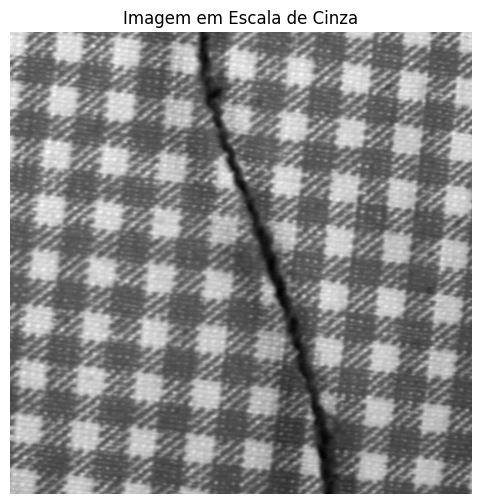


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 3


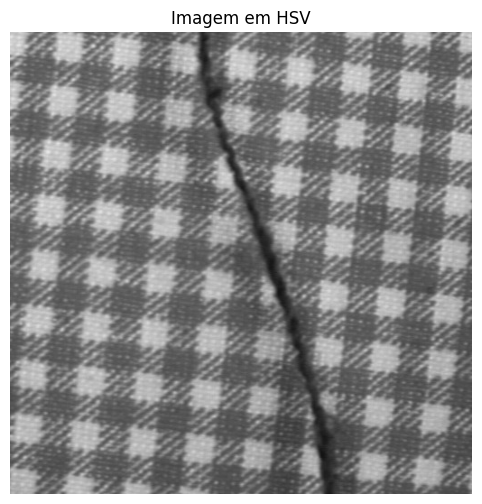


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 4


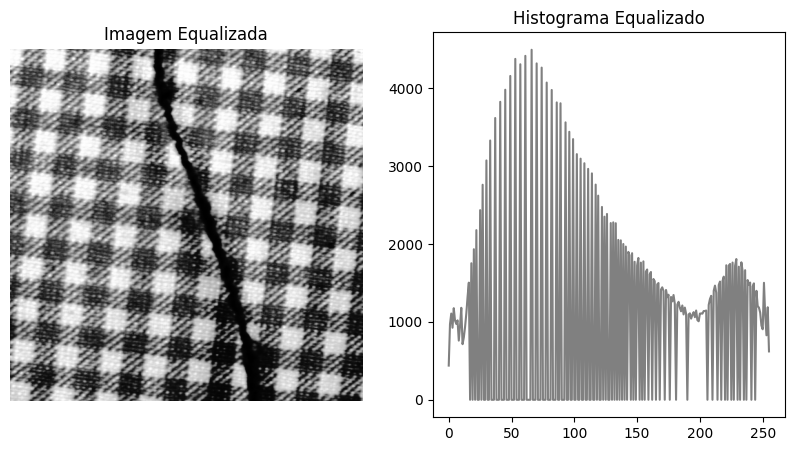


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 5


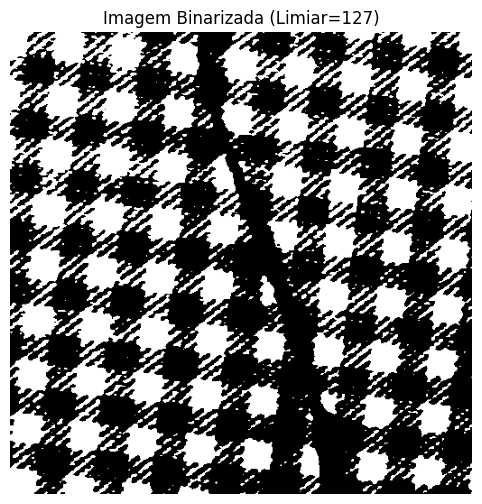


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 6


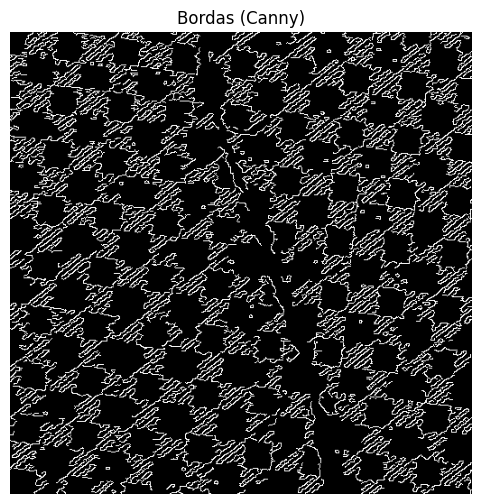


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 7

--- [Métricas Globais] ---
 > Entropia: 7.0971
 > Variância: 1540.3370
 > Homogeneidade: 0.1939

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. C

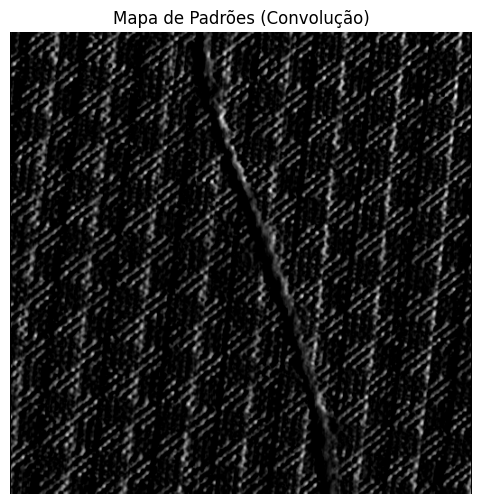


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 10


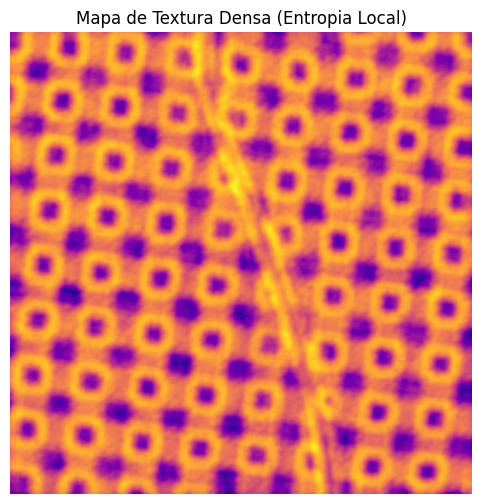


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 11

--- [Comparação] ---
Cole o CAMINHO da SEGUNDA imagem: 12
 erro: Não é possível carregar a imagem em: 12 
 Verifique se o caminho esta correto e o arquivo existe 
Falha ao processar a segunda imagem.

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --

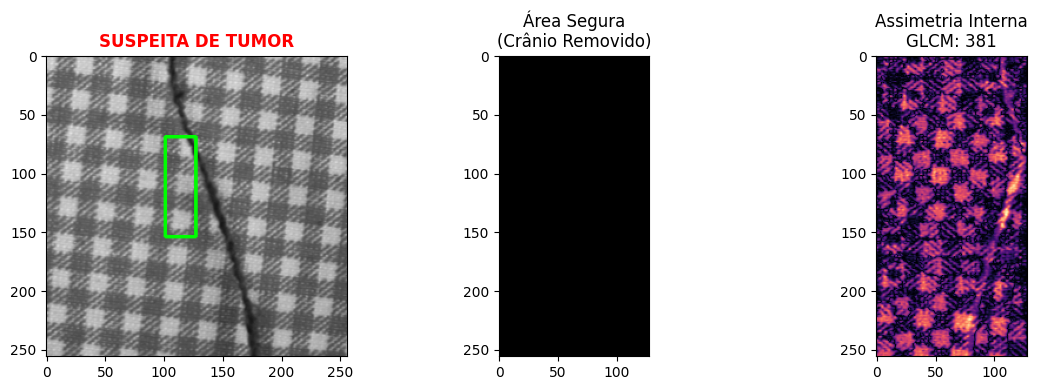


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 14

--- ANÁLISE DE COMPLEXIDADE (CAOS/SUAVIDADE) ---


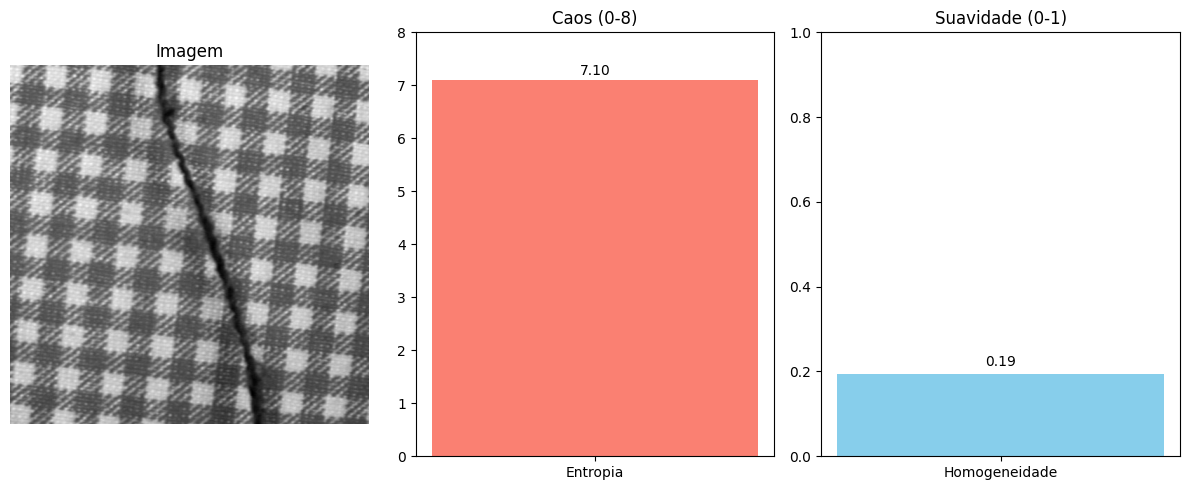


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 15

--- MAPA DE CONTRASTE LOCAL (GLCM ITERATIVO) ---
Iniciando cálculo... (Janela 7x7, Níveis 16)
AVISO: Esta operação pode demorar vários minutos!
Cálculo concluído.


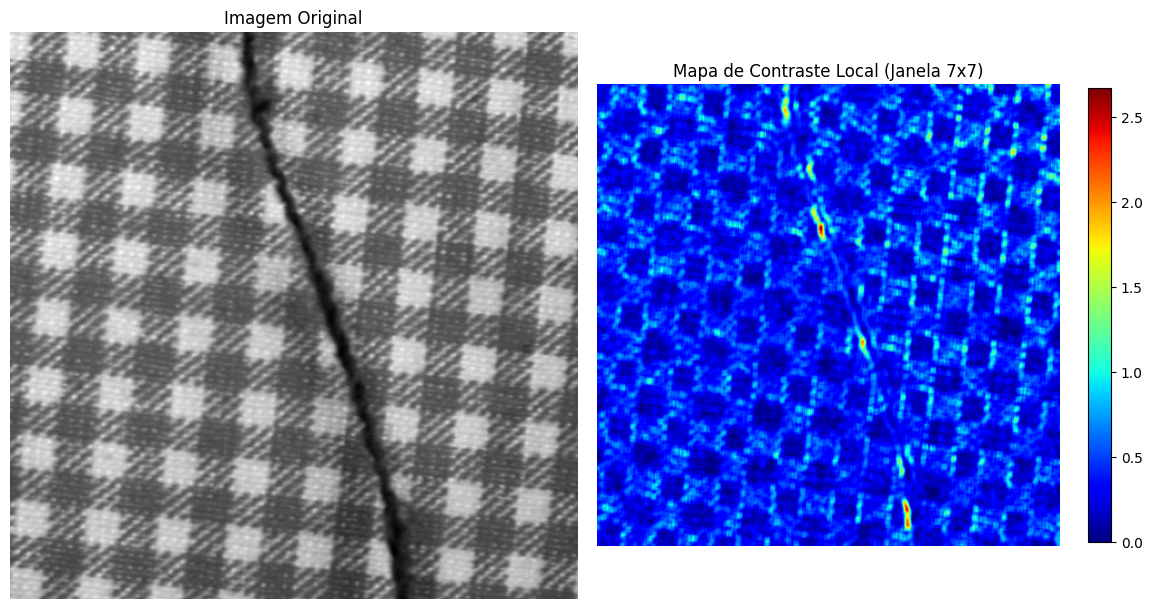


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: tecidoDanificadoXadrez.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 0
Saindo...


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import json
import sys
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte

# --- FUNÇÕES DE PROCESSAMENTO ---

def processar_imagem(caminho_imagem):
    try:
        image = cv2.imread(caminho_imagem)
        if image is None:
            raise FileNotFoundError()
    except FileNotFoundError:
        print(f" erro: Não é possível carregar a imagem em: {caminho_imagem} ")
        print(" Verifique se o caminho esta correto e o arquivo existe ")
        return None

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    nome_arquivo = os.path.basename(caminho_imagem)

    entropy = shannon_entropy(gray_image)
    variance = np.var(gray_image)
    glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    medidas = {
        "Entropia": entropy,
        "Variância": variance,
        "Homogeneidade": homogeneity
    }

    LIMIAR_ENTROPIA = 7.0
    classificacao = "Alta Complexidade" if entropy > LIMIAR_ENTROPIA else "Baixa Complexidade"

    kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mapa_convolucao = cv2.filter2D(gray_image, -1, kernel_vertical)

    mapa_textura = rank.entropy(gray_image, disk(10))

    return {
        "nome_arquivo": nome_arquivo,
        "medidas": medidas,
        "classificacao": classificacao,
        "original_gray": gray_image,
        "original_color": image,
        "mapa_conv": mapa_convolucao,
        "mapa_textura": mapa_textura
    }


def gerar_graficos_comparativos(lista_de_resultados):
    if not lista_de_resultados or len(lista_de_resultados) < 2:
        print(" erro: é necessários pelo menos 2 resultados para realizar a comparar.")
        return

    nomes = [r['nome_arquivo'] for r in lista_de_resultados]
    entropias = [r['medidas']['Entropia'] for r in lista_de_resultados]
    variancias = [r['medidas']['Variância'] for r in lista_de_resultados]
    homogeneidades = [r['medidas']['Homogeneidade'] for r in lista_de_resultados]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle("Gráficos Comparativos (Medidas Globais)", fontsize=16)

    axes[0].bar(nomes, entropias, color='blue')
    axes[0].set_title("Entropia (Aleatoriedade)")
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(nomes, variancias, color='green')
    axes[1].set_title("Variância (Contraste)")
    axes[1].tick_params(axis='x', rotation=45)

    axes[2].bar(nomes, homogeneidades, color='red')
    axes[2].set_title("Homogeneidade (Suavidade)")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def analisar_tecido_glcm(imagem_gray):
    print("\n--- Contexto: INSPEÇÃO DE TECIDO (GLCM AVANÇADO) ---")

    imagem = cv2.resize(imagem_gray, (300, 300))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    img_borra = cv2.medianBlur(imagem, 21)
    _, mascara = cv2.threshold(img_borra, 80, 255, cv2.THRESH_BINARY_INV)
    contor, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    recorte = imagem[0:50, 0:50]
    com_erro = False

    if contor:
        borda = max(contor, key=cv2.contourArea)
        if cv2.contourArea(borda) > 100:
            com_erro = True
            pos_x, pos_y, larg, altu = cv2.boundingRect(borda)
            larg, altu = max(larg, 40), max(altu, 40)
            recorte = imagem[pos_y:min(pos_y+altu, 299), pos_x:min(pos_x+larg, 299)]
            cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+larg, pos_y+altu), (0, 0, 255), 2)

    if recorte.size > 0:
        matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
        energia = graycoprops(matriz, 'energy')[0, 0]
        contraste = graycoprops(matriz, 'contrast')[0, 0]
    else:
        energia, contraste = 0, 0

    res_txt = "DANIFICADO" if com_erro else "INTEIRO"
    cor_txt = 'red' if com_erro else 'green'

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(f"Diagnóstico: {res_txt}", color=cor_txt, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.imshow(recorte, cmap='gray')
    plt.title(f"Recorte Analisado (GLCM)\nEnergia: {energia:.4f} (Ordem)\nContraste: {contraste:.1f} (Rugosidade)")
    plt.tight_layout()
    plt.show()

def analisar_tumor_assimetria(imagem_gray):
    """ Contexto: DIAGNÓSTICO DE TUMOR (COM FILTRO DE CRÂNIO) """
    print("\n--- Contexto: DIAGNÓSTICO DE TUMOR (ASSIMETRIA) ---")

    imagem = cv2.resize(imagem_gray, (256, 256))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    altu, larg = imagem.shape
    dif_img = cv2.absdiff(imagem[:, :larg//2], cv2.flip(imagem[:, larg//2:], 1))

    _, masc_cab = cv2.threshold(imagem, 10, 255, cv2.THRESH_BINARY)
    masc_seg = cv2.erode(masc_cab[:, :larg//2], np.ones((15,15), np.uint8), iterations=2)
    dif_filt = cv2.bitwise_and(dif_img, dif_img, mask=masc_seg)
    _, masc_blb = cv2.threshold(dif_filt, 50, 255, cv2.THRESH_BINARY)
    grupos, _ = cv2.findContours(masc_blb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    con_int = 0.0
    doente = False

    if grupos:
        borda = max(grupos, key=cv2.contourArea)
        if cv2.contourArea(borda) > 50:
            pos_x, pos_y, lar_bx, alt_bx = cv2.boundingRect(borda)
            recorte = dif_img[pos_y:pos_y+alt_bx, pos_x:pos_x+lar_bx]
            if recorte.size > 0:
                matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
                con_int = graycoprops(matriz, 'contrast')[0, 0]
                if con_int > 100:
                    doente = True
                    cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+lar_bx, pos_y+alt_bx), (0, 255, 0), 2)

    laudo = "SUSPEITA DE TUMOR" if doente else "SAUDÁVEL"
    cor_res = 'red' if doente else 'green'

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(laudo, color=cor_res, fontweight='bold')
    plt.subplot(1, 3, 2)
    plt.imshow(masc_seg, cmap='gray')
    plt.title("Área Segura\n(Crânio Removido)")
    plt.subplot(1, 3, 3)
    plt.imshow(dif_filt, cmap='magma')
    plt.title(f"Assimetria Interna\nGLCM: {con_int:.0f}")
    plt.tight_layout()
    plt.show()

def analisar_complexidade_caos(imagem_gray):
    """ ANÁLISE DE COMPLEXIDADE (Entropia/Harmonia) """
    print("\n--- ANÁLISE DE COMPLEXIDADE (CAOS/SUAVIDADE) ---")

    entropia = shannon_entropy(imagem_gray)
    matriz = graycomatrix(imagem_gray, [1], [0], 256, symmetric=True, normed=True)
    homogen = graycoprops(matriz, 'homogeneity')[0, 0]

    figura, eixos = plt.subplots(1, 3, figsize=(12, 5))
    eixos[0].imshow(imagem_gray, cmap='gray')
    eixos[0].set_title("Imagem")
    eixos[0].axis('off')
    eixos[1].bar(['Entropia'], [entropia], color='salmon')
    eixos[1].set_ylim(0, 8)
    eixos[1].set_title("Caos (0-8)")
    eixos[1].text(0, entropia+0.1, f"{entropia:.2f}", ha='center')
    eixos[2].bar(['Homogeneidade'], [homogen], color='skyblue')
    eixos[2].set_ylim(0, 1)
    eixos[2].set_title("Suavidade (0-1)")
    eixos[2].text(0, homogen+0.02, f"{homogen:.2f}", ha='center')
    plt.tight_layout()
    plt.show()


def calcular_mapa_contraste_local(imagem_gray, N_LEVELS=16, WINDOW_SIZE=7):
    """ Implementa a medição de contraste local utilizando a matriz GLCM (LENTO) """
    print("\n--- MAPA DE CONTRASTE LOCAL (GLCM ITERATIVO) ---")
    print(f"Iniciando cálculo... (Janela {WINDOW_SIZE}x{WINDOW_SIZE}, Níveis {N_LEVELS})")
    print("AVISO: Esta operação pode demorar vários minutos!")

    try:
        image_ubyte = img_as_ubyte(imagem_gray)
        image_quantized = (image_ubyte // (256 // N_LEVELS)).astype(int)

        pad_size = WINDOW_SIZE // 2
        image_padded = np.pad(image_quantized, pad_size, mode='reflect')

        height, width = image_quantized.shape
        contrast_map = np.zeros((height, width), dtype=float)

        for i in range(height):
            for j in range(width):
                window = image_padded[i : i + WINDOW_SIZE, j : j + WINDOW_SIZE]
                glcm = graycomatrix(window, [1], [0], levels=N_LEVELS, symmetric=True, normed=True)
                contrast = graycoprops(glcm, 'contrast')[0, 0]
                contrast_map[i, j] = contrast

        print("Cálculo concluído.")

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(imagem_gray, cmap='gray')
        axes[0].set_title('Imagem Original')
        axes[0].axis('off')
        im = axes[1].imshow(contrast_map, cmap='jet')
        axes[1].set_title(f'Mapa de Contraste Local (Janela {WINDOW_SIZE}x{WINDOW_SIZE})')
        axes[1].axis('off')
        fig.colorbar(im, ax=axes[1], shrink=0.8)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro durante o cálculo do mapa de contraste: {e}")


def exibir_mapa(mapa, titulo, cmap='gray'):
    """Função helper para mostrar um único mapa."""
    plt.figure(figsize=(8, 6))
    plt.imshow(mapa, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def converter_hsv(img_color):
    return cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

def equalizar_histograma(img_gray):
    eq = cv2.equalizeHist(img_gray)
    hist_eq = cv2.calcHist([eq], [0], None, [256], [0,256])

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(eq, cmap='gray')
    plt.title("Imagem Equalizada")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist_eq, color='gray')
    plt.title("Histograma Equalizado")
    plt.show()
    return eq

def binarizar_imagem(img_gray, limiar=127):
    _, bw = cv2.threshold(img_gray, limiar, 255, cv2.THRESH_BINARY)
    exibir_mapa(bw, f"Imagem Binarizada (Limiar={limiar})")
    return bw

def detectar_bordas(img_gray):
    bordas = cv2.Canny(img_gray, 100, 200)
    exibir_mapa(bordas, "Bordas (Canny)")
    return bordas

def detectar_formas_geometricas(img_color):
    """ Detecta formas geométricas e usa 'forms.json' do mesmo diretório """
    json_path = "forms.json"
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            formas_dict = json.load(f)
    except FileNotFoundError:
        print(f"Erro: Arquivo 'forms.json' não encontrado.")
        print("Crie-o no mesmo diretório do script com o conteúdo:")
        print('{"3": "Triangulo", "4": "Quadrilatero", "5": "Pentagono"}')
        return []

    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    bordas = cv2.Canny(gray, 80, 200)
    contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_saida = img_color.copy()
    formas_encontradas = []

    for c in contornos:
        if cv2.contourArea(c) < 200: continue
        per = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.04 * per, True)
        lados = len(aprox)
        nome = formas_dict.get(str(lados), f"{lados} lados")

        M = cv2.moments(c)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.putText(img_saida, nome, (cx - 40, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        cv2.drawContours(img_saida, [aprox], -1, (0, 255, 0), 2)
        formas_encontradas.append({"forma": nome, "lados": lados})

    exibir_mapa(cv2.cvtColor(img_saida, cv2.COLOR_BGR2RGB), "Formas Detectadas")
    print(f"Formas detectadas: {formas_encontradas}")
    return formas_encontradas

def gerar_relatorio(resultados, caminho_relatorio="relatorio.txt"):
    """ Gera um relatório em .txt com base nos resultados processados """
    try:
        with open(caminho_relatorio, "w") as f:
            f.write("=== RELATÓRIO DE ANÁLISE DE IMAGEM ===\n")
            f.write(f"Arquivo: {resultados['nome_arquivo']}\n")
            f.write(f"Dimensões: {resultados['original_color'].shape[1]}x{resultados['original_color'].shape[0]}\n")
            f.write("\n--- Métricas Globais ---\n")
            for chave, valor in resultados['medidas'].items():
                f.write(f"{chave}: {valor:.4f}\n")
            f.write(f"\nClassificação: {resultados['classificacao']}\n")
        print(f"Relatório salvo com sucesso em: {caminho_relatorio}")
    except Exception as e:
        print(f"Erro ao gerar relatório: {e}")


# --- FUNÇÃO MAIN REORGANIZADA ---

def main():
    """Função principal com o menu reorganizado conforme solicitado."""

    resultados_principal = None

    while True:
        nome_arquivo = resultados_principal['nome_arquivo'] if resultados_principal else None

        print("\n-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --")
        if nome_arquivo:
            print(f"Imagem Carregada: {nome_arquivo}")
        else:
            print("Nenhuma imagem carregada. Comece pela Opção 1.")

        print("-----------------------------------------------------")
        print(" 1. Carregar/Processar Nova Imagem Principal")
        print(" 2. Converter para escala de cinza")
        print(" 3. Converter para HSV")
        print(" 4. Equalizar histograma")
        print(" 5. Binarizar imagem")
        print(" 6. Detectar bordas")
        print(" 7. Calcular métricas Globais")
        print(" 8. Análise de Complexidade")
        print(" 9. Exibir Mapa de Padrões (Convolução)")
        print(" 10. Exibir Mapa de Textura Densa (Entropia Local)")
        print(" 11. Comparar com metricas globais de segunda imagem")
        print(" 12. Análise de Tecido")
        print(" 13. Análise de Tumor")
        print(" 14. Análise de Complexidade (Caos/Suavidade)")
        print(" 15. Mapa de contraste local")
        print(" 16. Gerar relatório em txt")
        print(" 0. Sair")
        print("-----------------------------------------------------")

        escolha = input("\nEscolha uma opção: ")

        # Opção 1: Carregar
        if escolha == '1':
            caminho_principal_input = input("Cole o CAMINHO da imagem principal: ").strip().strip("'\"")
            resultados_principal = processar_imagem(caminho_principal_input)
            if resultados_principal:
                print("\n--- Imagem Carregada e Processada! ---")
            else:
                resultados_principal = None
            continue

        # Opção 0: Sair
        elif escolha == '0':
            print("Saindo...")
            break

        # Verificação de segurança: Se não carregou imagem, não executa o resto
        if not resultados_principal:
            print("\nErro: Nenhuma imagem carregada. Use a Opção 1 primeiro.")
            time.sleep(1)
            continue

        # Opção 2: Converter para escala de cinza
        if escolha == '2':
            exibir_mapa(resultados_principal['original_gray'], "Imagem em Escala de Cinza")

        # Opção 3: Converter para HSV
        elif escolha == '3':
            hsv = converter_hsv(resultados_principal['original_color'])
            exibir_mapa(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), "Imagem em HSV")

        # Opção 4: Equalizar histograma
        elif escolha == '4':
            equalizar_histograma(resultados_principal['original_gray'])

        # Opção 5: Binarizar imagem
        elif escolha == '5':
            binarizar_imagem(resultados_principal['original_gray'])

        # Opção 6: Detectar bordas
        elif escolha == '6':
            detectar_bordas(resultados_principal['original_gray'])

        # Opção 7: Calcular métricas Globais
        elif escolha == '7':
            print("\n--- [Métricas Globais] ---")
            for chave, valor in resultados_principal['medidas'].items():
                print(f" > {chave}: {valor:.4f}")

        # Opção 8: Análise de Complexidade (Classificação String)
        elif escolha == '8':
            print("\n--- [Classificação de Complexidade] ---")
            print(f" > {resultados_principal['classificacao']}")

        # Opção 9: Exibir Mapa de Padrões (Convolução)
        elif escolha == '9':
            exibir_mapa(resultados_principal['mapa_conv'], "Mapa de Padrões (Convolução)", cmap='gray')

        # Opção 10: Exibir Mapa de Textura Densa (Entropia Local)
        elif escolha == '10':
            exibir_mapa(resultados_principal['mapa_textura'], "Mapa de Textura Densa (Entropia Local)", cmap='plasma')

        # Opção 11: Comparar com metricas globais de segunda imagem
        elif escolha == '11':
            print("\n--- [Comparação] ---")
            caminho_secundaria_input = input("Cole o CAMINHO da SEGUNDA imagem: ").strip().strip("'\"")
            resultados_secundaria = processar_imagem(caminho_secundaria_input)
            if resultados_secundaria:
                print("Processando comparação e gerando gráfico...")
                gerar_graficos_comparativos([resultados_principal, resultados_secundaria])
            else:
                print("Falha ao processar a segunda imagem.")

        # Opção 12: Análise de Tecido
        elif escolha == '12':
            analisar_tecido_glcm(resultados_principal['original_gray'])

        # Opção 13: Análise de Tumor
        elif escolha == '13':
            analisar_tumor_assimetria(resultados_principal['original_gray'])

        # Opção 14: Análise de Complexidade (Gráficos Caos/Suavidade)
        elif escolha == '14':
            analisar_complexidade_caos(resultados_principal['original_gray'])

        # Opção 15: Mapa de contraste local
        elif escolha == '15':
            calcular_mapa_contraste_local(resultados_principal['original_gray'])

        # Opção 16: Gerar relatório em txt
        elif escolha == '16':
            gerar_relatorio(resultados_principal)

        else:
            print("Opção inválida. Tente novamente.")

        time.sleep(1)

if __name__ == "__main__":
    main()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import json
import sys
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte

# --- FUNÇÕES DE PROCESSAMENTO ---

def processar_imagem(caminho_imagem):
    try:
        image = cv2.imread(caminho_imagem)
        if image is None:
            raise FileNotFoundError()
    except FileNotFoundError:
        print(f" erro: Não é possível carregar a imagem em: {caminho_imagem} ")
        print(" Verifique se o caminho esta correto e o arquivo existe ")
        return None

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    nome_arquivo = os.path.basename(caminho_imagem)

    entropy = shannon_entropy(gray_image)
    variance = np.var(gray_image)
    glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    medidas = {
        "Entropia": entropy,
        "Variância": variance,
        "Homogeneidade": homogeneity
    }

    LIMIAR_ENTROPIA = 7.0
    classificacao = "Alta Complexidade" if entropy > LIMIAR_ENTROPIA else "Baixa Complexidade"

    kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mapa_convolucao = cv2.filter2D(gray_image, -1, kernel_vertical)

    mapa_textura = rank.entropy(gray_image, disk(10))

    return {
        "nome_arquivo": nome_arquivo,
        "medidas": medidas,
        "classificacao": classificacao,
        "original_gray": gray_image,
        "original_color": image,
        "mapa_conv": mapa_convolucao,
        "mapa_textura": mapa_textura
    }


def gerar_graficos_comparativos(lista_de_resultados):
    if not lista_de_resultados or len(lista_de_resultados) < 2:
        print(" erro: é necessários pelo menos 2 resultados para realizar a comparar.")
        return

    nomes = [r['nome_arquivo'] for r in lista_de_resultados]
    entropias = [r['medidas']['Entropia'] for r in lista_de_resultados]
    variancias = [r['medidas']['Variância'] for r in lista_de_resultados]
    homogeneidades = [r['medidas']['Homogeneidade'] for r in lista_de_resultados]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle("Gráficos Comparativos (Medidas Globais)", fontsize=16)

    axes[0].bar(nomes, entropias, color='blue')
    axes[0].set_title("Entropia (Aleatoriedade)")
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(nomes, variancias, color='green')
    axes[1].set_title("Variância (Contraste)")
    axes[1].tick_params(axis='x', rotation=45)

    axes[2].bar(nomes, homogeneidades, color='red')
    axes[2].set_title("Homogeneidade (Suavidade)")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def analisar_tecido_glcm(imagem_gray):
    print("\n--- Contexto: INSPEÇÃO DE TECIDO (GLCM AVANÇADO) ---")

    imagem = cv2.resize(imagem_gray, (300, 300))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    img_borra = cv2.medianBlur(imagem, 21)
    _, mascara = cv2.threshold(img_borra, 80, 255, cv2.THRESH_BINARY_INV)
    contor, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    recorte = imagem[0:50, 0:50]
    com_erro = False

    if contor:
        borda = max(contor, key=cv2.contourArea)
        if cv2.contourArea(borda) > 100:
            com_erro = True
            pos_x, pos_y, larg, altu = cv2.boundingRect(borda)
            larg, altu = max(larg, 40), max(altu, 40)
            recorte = imagem[pos_y:min(pos_y+altu, 299), pos_x:min(pos_x+larg, 299)]
            cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+larg, pos_y+altu), (0, 0, 255), 2)

    if recorte.size > 0:
        matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
        energia = graycoprops(matriz, 'energy')[0, 0]
        contraste = graycoprops(matriz, 'contrast')[0, 0]
    else:
        energia, contraste = 0, 0

    res_txt = "DANIFICADO" if com_erro else "INTEIRO"
    cor_txt = 'red' if com_erro else 'green'

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(f"Diagnóstico: {res_txt}", color=cor_txt, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.imshow(recorte, cmap='gray')
    plt.title(f"Recorte Analisado (GLCM)\nEnergia: {energia:.4f} (Ordem)\nContraste: {contraste:.1f} (Rugosidade)")
    plt.tight_layout()
    plt.show()

def analisar_tumor_assimetria(imagem_gray):
    """ Contexto: DIAGNÓSTICO DE TUMOR (COM FILTRO DE CRÂNIO) """
    print("\n--- Contexto: DIAGNÓSTICO DE TUMOR (ASSIMETRIA) ---")

    imagem = cv2.resize(imagem_gray, (256, 256))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    altu, larg = imagem.shape
    dif_img = cv2.absdiff(imagem[:, :larg//2], cv2.flip(imagem[:, larg//2:], 1))

    _, masc_cab = cv2.threshold(imagem, 10, 255, cv2.THRESH_BINARY)
    masc_seg = cv2.erode(masc_cab[:, :larg//2], np.ones((15,15), np.uint8), iterations=2)
    dif_filt = cv2.bitwise_and(dif_img, dif_img, mask=masc_seg)
    _, masc_blb = cv2.threshold(dif_filt, 50, 255, cv2.THRESH_BINARY)
    grupos, _ = cv2.findContours(masc_blb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    con_int = 0.0
    doente = False

    if grupos:
        borda = max(grupos, key=cv2.contourArea)
        if cv2.contourArea(borda) > 50:
            pos_x, pos_y, lar_bx, alt_bx = cv2.boundingRect(borda)
            recorte = dif_img[pos_y:pos_y+alt_bx, pos_x:pos_x+lar_bx]
            if recorte.size > 0:
                matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
                con_int = graycoprops(matriz, 'contrast')[0, 0]
                if con_int > 100:
                    doente = True
                    cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+lar_bx, pos_y+alt_bx), (0, 255, 0), 2)

    laudo = "SUSPEITA DE TUMOR" if doente else "SAUDÁVEL"
    cor_res = 'red' if doente else 'green'

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(laudo, color=cor_res, fontweight='bold')
    plt.subplot(1, 3, 2)
    plt.imshow(masc_seg, cmap='gray')
    plt.title("Área Segura\n(Crânio Removido)")
    plt.subplot(1, 3, 3)
    plt.imshow(dif_filt, cmap='magma')
    plt.title(f"Assimetria Interna\nGLCM: {con_int:.0f}")
    plt.tight_layout()
    plt.show()

def analisar_complexidade_caos(imagem_gray):
    """ ANÁLISE DE COMPLEXIDADE (Entropia/Harmonia) """
    print("\n--- ANÁLISE DE COMPLEXIDADE (CAOS/SUAVIDADE) ---")

    entropia = shannon_entropy(imagem_gray)
    matriz = graycomatrix(imagem_gray, [1], [0], 256, symmetric=True, normed=True)
    homogen = graycoprops(matriz, 'homogeneity')[0, 0]

    figura, eixos = plt.subplots(1, 3, figsize=(12, 5))
    eixos[0].imshow(imagem_gray, cmap='gray')
    eixos[0].set_title("Imagem")
    eixos[0].axis('off')
    eixos[1].bar(['Entropia'], [entropia], color='salmon')
    eixos[1].set_ylim(0, 8)
    eixos[1].set_title("Caos (0-8)")
    eixos[1].text(0, entropia+0.1, f"{entropia:.2f}", ha='center')
    eixos[2].bar(['Homogeneidade'], [homogen], color='skyblue')
    eixos[2].set_ylim(0, 1)
    eixos[2].set_title("Suavidade (0-1)")
    eixos[2].text(0, homogen+0.02, f"{homogen:.2f}", ha='center')
    plt.tight_layout()
    plt.show()


def calcular_mapa_contraste_local(imagem_gray, N_LEVELS=16, WINDOW_SIZE=7):
    """ Implementa a medição de contraste local utilizando a matriz GLCM (LENTO) """
    print("\n--- MAPA DE CONTRASTE LOCAL (GLCM ITERATIVO) ---")
    print(f"Iniciando cálculo... (Janela {WINDOW_SIZE}x{WINDOW_SIZE}, Níveis {N_LEVELS})")
    print("AVISO: Esta operação pode demorar vários minutos!")

    try:
        image_ubyte = img_as_ubyte(imagem_gray)
        image_quantized = (image_ubyte // (256 // N_LEVELS)).astype(int)

        pad_size = WINDOW_SIZE // 2
        image_padded = np.pad(image_quantized, pad_size, mode='reflect')

        height, width = image_quantized.shape
        contrast_map = np.zeros((height, width), dtype=float)

        for i in range(height):
            for j in range(width):
                window = image_padded[i : i + WINDOW_SIZE, j : j + WINDOW_SIZE]
                glcm = graycomatrix(window, [1], [0], levels=N_LEVELS, symmetric=True, normed=True)
                contrast = graycoprops(glcm, 'contrast')[0, 0]
                contrast_map[i, j] = contrast

        print("Cálculo concluído.")

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(imagem_gray, cmap='gray')
        axes[0].set_title('Imagem Original')
        axes[0].axis('off')
        im = axes[1].imshow(contrast_map, cmap='jet')
        axes[1].set_title(f'Mapa de Contraste Local (Janela {WINDOW_SIZE}x{WINDOW_SIZE})')
        axes[1].axis('off')
        fig.colorbar(im, ax=axes[1], shrink=0.8)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro durante o cálculo do mapa de contraste: {e}")


def exibir_mapa(mapa, titulo, cmap='gray'):
    """Função helper para mostrar um único mapa."""
    plt.figure(figsize=(8, 6))
    plt.imshow(mapa, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def converter_hsv(img_color):
    return cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

def equalizar_histograma(img_gray):
    eq = cv2.equalizeHist(img_gray)
    hist_eq = cv2.calcHist([eq], [0], None, [256], [0,256])

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(eq, cmap='gray')
    plt.title("Imagem Equalizada")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist_eq, color='gray')
    plt.title("Histograma Equalizado")
    plt.show()
    return eq

def binarizar_imagem(img_gray, limiar=127):
    _, bw = cv2.threshold(img_gray, limiar, 255, cv2.THRESH_BINARY)
    exibir_mapa(bw, f"Imagem Binarizada (Limiar={limiar})")
    return bw

def detectar_bordas(img_gray):
    bordas = cv2.Canny(img_gray, 100, 200)
    exibir_mapa(bordas, "Bordas (Canny)")
    return bordas

def detectar_formas_geometricas(img_color):
    """ Detecta formas geométricas e usa 'forms.json' do mesmo diretório """
    json_path = "forms.json"
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            formas_dict = json.load(f)
    except FileNotFoundError:
        print(f"Erro: Arquivo 'forms.json' não encontrado.")
        print("Crie-o no mesmo diretório do script com o conteúdo:")
        print('{"3": "Triangulo", "4": "Quadrilatero", "5": "Pentagono"}')
        return []

    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    bordas = cv2.Canny(gray, 80, 200)
    contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_saida = img_color.copy()
    formas_encontradas = []

    for c in contornos:
        if cv2.contourArea(c) < 200: continue
        per = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.04 * per, True)
        lados = len(aprox)
        nome = formas_dict.get(str(lados), f"{lados} lados")

        M = cv2.moments(c)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.putText(img_saida, nome, (cx - 40, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        cv2.drawContours(img_saida, [aprox], -1, (0, 255, 0), 2)
        formas_encontradas.append({"forma": nome, "lados": lados})

    exibir_mapa(cv2.cvtColor(img_saida, cv2.COLOR_BGR2RGB), "Formas Detectadas")
    print(f"Formas detectadas: {formas_encontradas}")
    return formas_encontradas

def gerar_relatorio(resultados, caminho_relatorio="relatorio.txt"):
    """ Gera um relatório em .txt com base nos resultados processados """
    try:
        with open(caminho_relatorio, "w") as f:
            f.write("=== RELATÓRIO DE ANÁLISE DE IMAGEM ===\n")
            f.write(f"Arquivo: {resultados['nome_arquivo']}\n")
            f.write(f"Dimensões: {resultados['original_color'].shape[1]}x{resultados['original_color'].shape[0]}\n")
            f.write("\n--- Métricas Globais ---\n")
            for chave, valor in resultados['medidas'].items():
                f.write(f"{chave}: {valor:.4f}\n")
            f.write(f"\nClassificação: {resultados['classificacao']}\n")
        print(f"Relatório salvo com sucesso em: {caminho_relatorio}")
    except Exception as e:
        print(f"Erro ao gerar relatório: {e}")


# --- FUNÇÃO MAIN REORGANIZADA ---

def main():
    """Função principal com o menu reorganizado conforme solicitado."""

    resultados_principal = None

    while True:
        nome_arquivo = resultados_principal['nome_arquivo'] if resultados_principal else None

        print("\n-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --")
        if nome_arquivo:
            print(f"Imagem Carregada: {nome_arquivo}")
        else:
            print("Nenhuma imagem carregada. Comece pela Opção 1.")

        print("-----------------------------------------------------")
        print(" 1. Carregar/Processar Nova Imagem Principal")
        print(" 2. Converter para escala de cinza")
        print(" 3. Converter para HSV")
        print(" 4. Equalizar histograma")
        print(" 5. Binarizar imagem")
        print(" 6. Detectar bordas")
        print(" 7. Calcular métricas Globais")
        print(" 8. Análise de Complexidade")
        print(" 9. Exibir Mapa de Padrões (Convolução)")
        print(" 10. Exibir Mapa de Textura Densa (Entropia Local)")
        print(" 11. Comparar com metricas globais de segunda imagem")
        print(" 12. Análise de Tecido")
        print(" 13. Análise de Tumor")
        print(" 14. Análise de Complexidade (Caos/Suavidade)")
        print(" 15. Mapa de contraste local")
        print(" 16. Gerar relatório em txt")
        print(" 0. Sair")
        print("-----------------------------------------------------")

        escolha = input("\nEscolha uma opção: ")

        # Opção 1: Carregar
        if escolha == '1':
            caminho_principal_input = input("Cole o CAMINHO da imagem principal: ").strip().strip("'\"")
            resultados_principal = processar_imagem(caminho_principal_input)
            if resultados_principal:
                print("\n--- Imagem Carregada e Processada! ---")
            else:
                resultados_principal = None
            continue

        # Opção 0: Sair
        elif escolha == '0':
            print("Saindo...")
            break

        # Verificação de segurança: Se não carregou imagem, não executa o resto
        if not resultados_principal:
            print("\nErro: Nenhuma imagem carregada. Use a Opção 1 primeiro.")
            time.sleep(1)
            continue

        # Opção 2: Converter para escala de cinza
        if escolha == '2':
            exibir_mapa(resultados_principal['original_gray'], "Imagem em Escala de Cinza")

        # Opção 3: Converter para HSV
        elif escolha == '3':
            hsv = converter_hsv(resultados_principal['original_color'])
            exibir_mapa(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), "Imagem em HSV")

        # Opção 4: Equalizar histograma
        elif escolha == '4':
            equalizar_histograma(resultados_principal['original_gray'])

        # Opção 5: Binarizar imagem
        elif escolha == '5':
            binarizar_imagem(resultados_principal['original_gray'])

        # Opção 6: Detectar bordas
        elif escolha == '6':
            detectar_bordas(resultados_principal['original_gray'])

        # Opção 7: Calcular métricas Globais
        elif escolha == '7':
            print("\n--- [Métricas Globais] ---")
            for chave, valor in resultados_principal['medidas'].items():
                print(f" > {chave}: {valor:.4f}")

        # Opção 8: Análise de Complexidade (Classificação String)
        elif escolha == '8':
            print("\n--- [Classificação de Complexidade] ---")
            print(f" > {resultados_principal['classificacao']}")

        # Opção 9: Exibir Mapa de Padrões (Convolução)
        elif escolha == '9':
            exibir_mapa(resultados_principal['mapa_conv'], "Mapa de Padrões (Convolução)", cmap='gray')

        # Opção 10: Exibir Mapa de Textura Densa (Entropia Local)
        elif escolha == '10':
            exibir_mapa(resultados_principal['mapa_textura'], "Mapa de Textura Densa (Entropia Local)", cmap='plasma')

        # Opção 11: Comparar com metricas globais de segunda imagem
        elif escolha == '11':
            print("\n--- [Comparação] ---")
            caminho_secundaria_input = input("Cole o CAMINHO da SEGUNDA imagem: ").strip().strip("'\"")
            resultados_secundaria = processar_imagem(caminho_secundaria_input)
            if resultados_secundaria:
                print("Processando comparação e gerando gráfico...")
                gerar_graficos_comparativos([resultados_principal, resultados_secundaria])
            else:
                print("Falha ao processar a segunda imagem.")

        # Opção 12: Análise de Tecido
        elif escolha == '12':
            analisar_tecido_glcm(resultados_principal['original_gray'])

        # Opção 13: Análise de Tumor
        elif escolha == '13':
            analisar_tumor_assimetria(resultados_principal['original_gray'])

        # Opção 14: Análise de Complexidade (Gráficos Caos/Suavidade)
        elif escolha == '14':
            analisar_complexidade_caos(resultados_principal['original_gray'])

        # Opção 15: Mapa de contraste local
        elif escolha == '15':
            calcular_mapa_contraste_local(resultados_principal['original_gray'])

        # Opção 16: Gerar relatório em txt
        elif escolha == '16':
            gerar_relatorio(resultados_principal)

        else:
            print("Opção inválida. Tente novamente.")

        time.sleep(1)

if __name__ == "__main__":
    main()


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Nenhuma imagem carregada. Comece pela Opção 1.
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 1
Cole o CAMINHO da imagem principal: /content/cerebroTumor.jpg

--- Imagem Carregada e Processada! ---

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carr

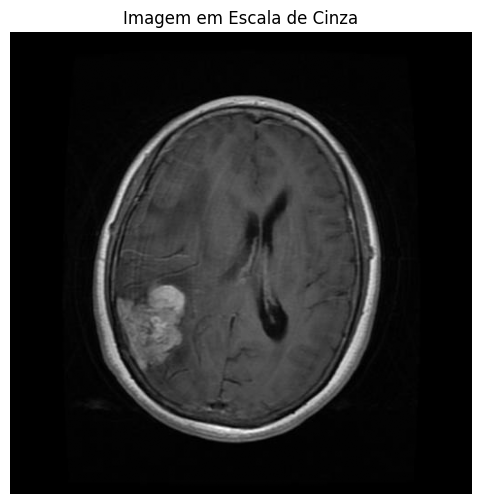


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 4


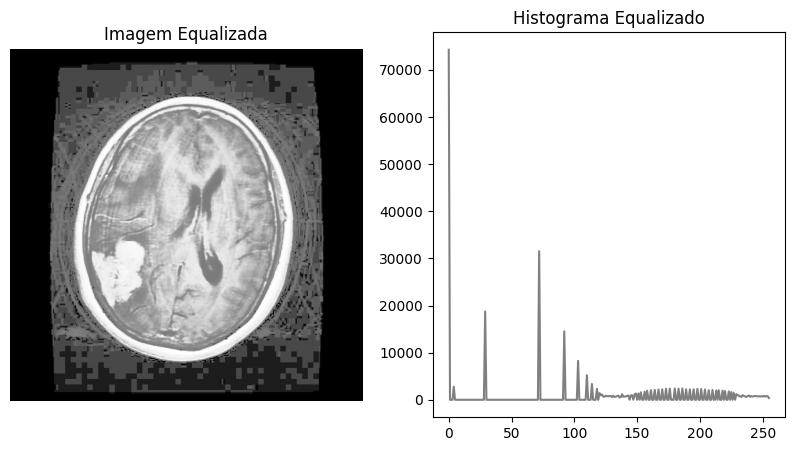


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 
Opção inválida. Tente novamente.

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Conver

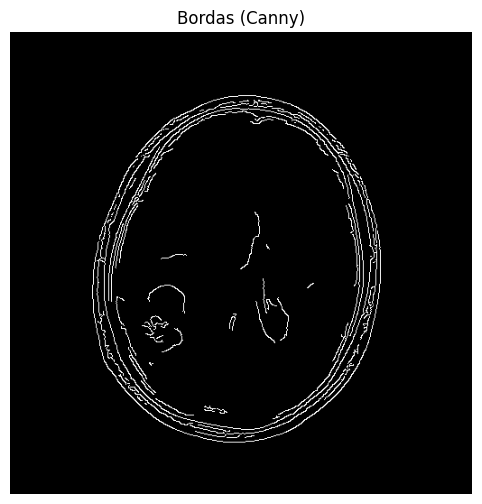


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 7

--- [Métricas Globais] ---
 > Entropia: 4.9846
 > Variância: 1702.5756
 > Homogeneidade: 0.6733

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar No

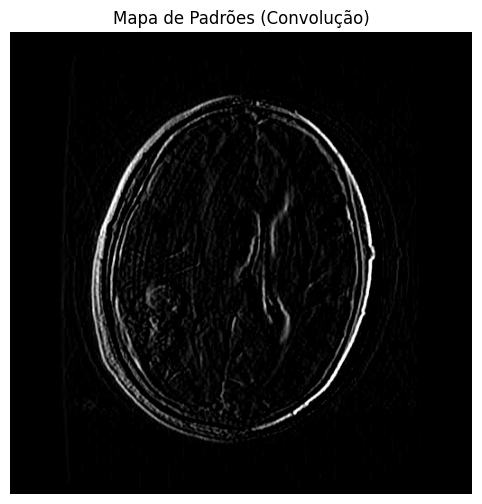


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 10


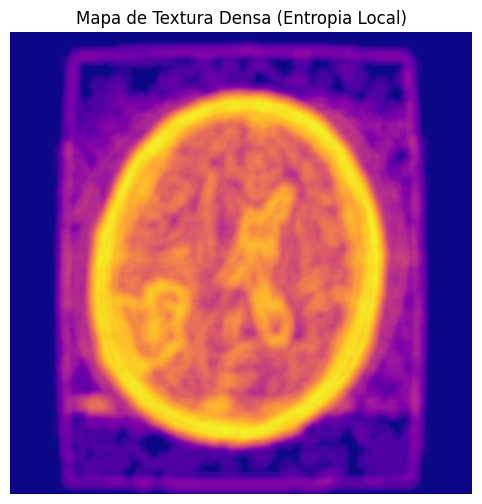


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 11

--- [Comparação] ---
Cole o CAMINHO da SEGUNDA imagem: 12
 erro: Não é possível carregar a imagem em: 12 
 Verifique se o caminho esta correto e o arquivo existe 
Falha ao processar a segunda imagem.

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Ca

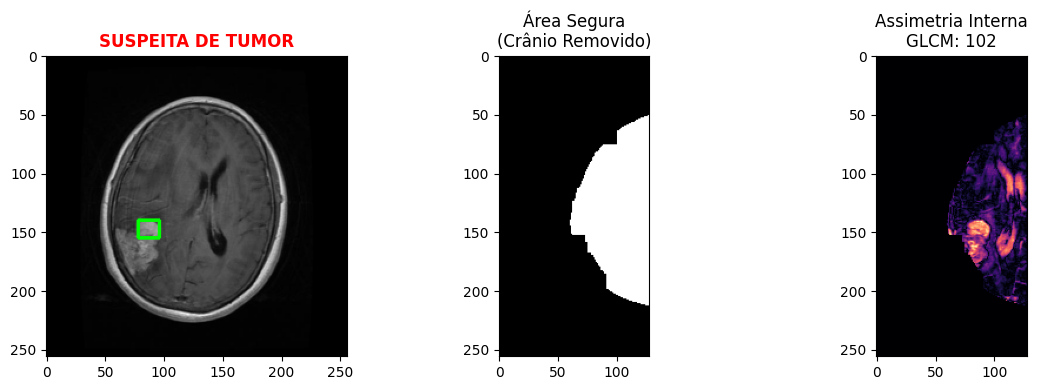


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 14

--- ANÁLISE DE COMPLEXIDADE (CAOS/SUAVIDADE) ---


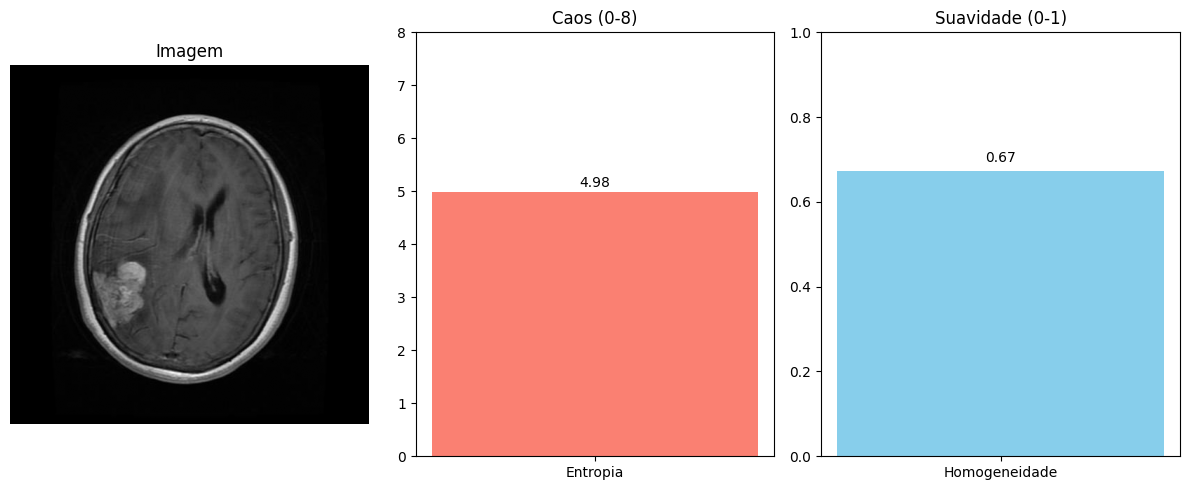


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 15

--- MAPA DE CONTRASTE LOCAL (GLCM ITERATIVO) ---
Iniciando cálculo... (Janela 7x7, Níveis 16)
AVISO: Esta operação pode demorar vários minutos!
Cálculo concluído.


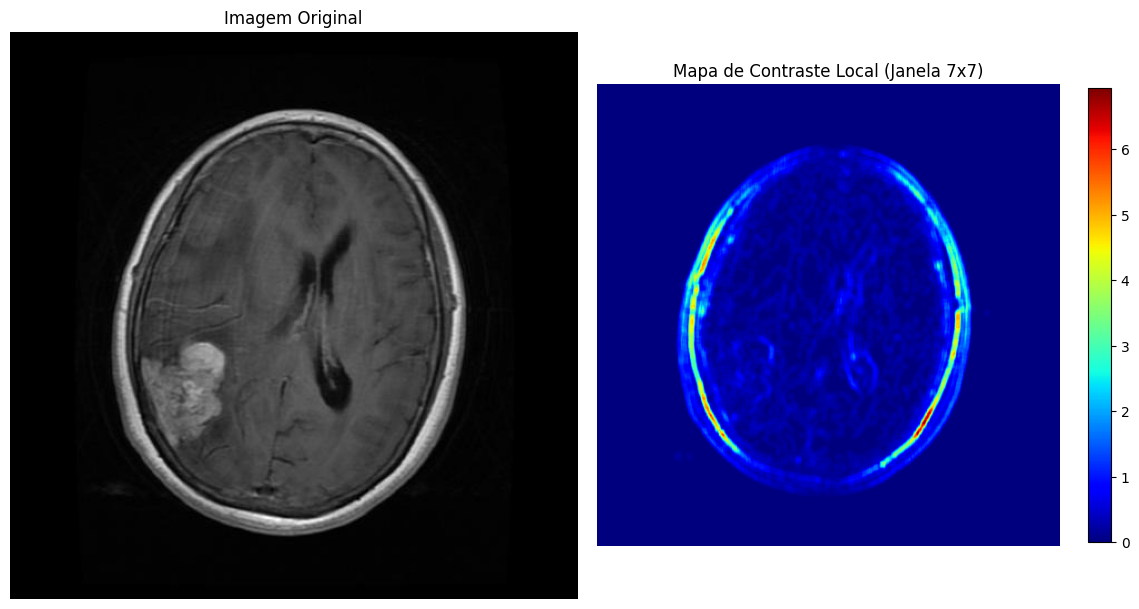


-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de cinza
 3. Converter para HSV
 4. Equalizar histograma
 5. Binarizar imagem
 6. Detectar bordas
 7. Calcular métricas Globais
 8. Análise de Complexidade
 9. Exibir Mapa de Padrões (Convolução)
 10. Exibir Mapa de Textura Densa (Entropia Local)
 11. Comparar com metricas globais de segunda imagem
 12. Análise de Tecido
 13. Análise de Tumor
 14. Análise de Complexidade (Caos/Suavidade)
 15. Mapa de contraste local
 16. Gerar relatório em txt
 0. Sair
-----------------------------------------------------

Escolha uma opção: 16
Relatório salvo com sucesso em: relatorio.txt

-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --
Imagem Carregada: cerebroTumor.jpg
-----------------------------------------------------
 1. Carregar/Processar Nova Imagem Principal
 2. Converter para escala de c

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import json
import sys
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte


def calcular_metricas_globais(gray_image):
    """Calcula Entropia, Variância e Homogeneidade (Item 7)."""
    entropy = shannon_entropy(gray_image)
    variance = np.var(gray_image)

    glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

    return {
        "Entropia": entropy,
        "Variância": variance,
        "Homogeneidade": homogeneity
    }

def classificar_complexidade(entropia):
    """Define a classificação baseada na entropia (Item 8)."""
    LIMIAR_ENTROPIA = 7.0
    return "Alta Complexidade" if entropia > LIMIAR_ENTROPIA else "Baixa Complexidade"

def gerar_mapa_convolucao(gray_image):
    """Aplica filtro de bordas verticais (Item 9)."""
    kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return cv2.filter2D(gray_image, -1, kernel_vertical)

def gerar_mapa_textura(gray_image):
    """Gera o mapa de entropia local (Item 10)."""
    return rank.entropy(gray_image, disk(10))


def processar_imagem(caminho_imagem):
    """
    Função Principal: Carrega a imagem e chama as sub-funções criadas acima.
    Mantém a estrutura do dicionário de retorno para não quebrar o resto do código.
    """
    try:
        image = cv2.imread(caminho_imagem)
        if image is None:
            raise FileNotFoundError()
    except FileNotFoundError:
        print(f" erro: Não é possível carregar a imagem em: {caminho_imagem} ")
        print(" Verifique se o caminho esta correto e o arquivo existe ")
        return None


    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    nome_arquivo = os.path.basename(caminho_imagem)

    medidas = calcular_metricas_globais(gray_image)


    classificacao = classificar_complexidade(medidas["Entropia"])

    mapa_convolucao = gerar_mapa_convolucao(gray_image)

    mapa_textura = gerar_mapa_textura(gray_image)

    return {
        "nome_arquivo": nome_arquivo,
        "medidas": medidas,
        "classificacao": classificacao,
        "original_gray": gray_image,
        "original_color": image,
        "mapa_conv": mapa_convolucao,
        "mapa_textura": mapa_textura
    }


def gerar_graficos_comparativos(lista_de_resultados):
    if not lista_de_resultados or len(lista_de_resultados) < 2:
        print(" erro: é necessários pelo menos 2 resultados para realizar a comparar.")
        return

    nomes = [r['nome_arquivo'] for r in lista_de_resultados]
    entropias = [r['medidas']['Entropia'] for r in lista_de_resultados]
    variancias = [r['medidas']['Variância'] for r in lista_de_resultados]
    homogeneidades = [r['medidas']['Homogeneidade'] for r in lista_de_resultados]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle("Gráficos Comparativos (Medidas Globais)", fontsize=16)

    axes[0].bar(nomes, entropias, color='blue')
    axes[0].set_title("Entropia (Aleatoriedade)")
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(nomes, variancias, color='green')
    axes[1].set_title("Variância (Contraste)")
    axes[1].tick_params(axis='x', rotation=45)

    axes[2].bar(nomes, homogeneidades, color='red')
    axes[2].set_title("Homogeneidade (Suavidade)")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def analisar_tecido_glcm(imagem_gray):
    print("\n--- Contexto: INSPEÇÃO DE TECIDO (GLCM AVANÇADO) ---")

    imagem = cv2.resize(imagem_gray, (300, 300))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    img_borra = cv2.medianBlur(imagem, 21)
    _, mascara = cv2.threshold(img_borra, 80, 255, cv2.THRESH_BINARY_INV)
    contor, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    recorte = imagem[0:50, 0:50]
    com_erro = False

    if contor:
        borda = max(contor, key=cv2.contourArea)
        if cv2.contourArea(borda) > 100:
            com_erro = True
            pos_x, pos_y, larg, altu = cv2.boundingRect(borda)
            larg, altu = max(larg, 40), max(altu, 40)
            recorte = imagem[pos_y:min(pos_y+altu, 299), pos_x:min(pos_x+larg, 299)]
            cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+larg, pos_y+altu), (0, 0, 255), 2)

    if recorte.size > 0:
        matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
        energia = graycoprops(matriz, 'energy')[0, 0]
        contraste = graycoprops(matriz, 'contrast')[0, 0]
    else:
        energia, contraste = 0, 0

    res_txt = "DANIFICADO" if com_erro else "INTEIRO"
    cor_txt = 'red' if com_erro else 'green'

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(f"Diagnóstico: {res_txt}", color=cor_txt, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.imshow(recorte, cmap='gray')
    plt.title(f"Recorte Analisado (GLCM)\nEnergia: {energia:.4f} (Ordem)\nContraste: {contraste:.1f} (Rugosidade)")
    plt.tight_layout()
    plt.show()

def analisar_tumor_assimetria(imagem_gray):
    """ Contexto: DIAGNÓSTICO DE TUMOR (COM FILTRO DE CRÂNIO) """
    print("\n--- Contexto: DIAGNÓSTICO DE TUMOR (ASSIMETRIA) ---")

    imagem = cv2.resize(imagem_gray, (256, 256))
    img_cor = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

    altu, larg = imagem.shape
    dif_img = cv2.absdiff(imagem[:, :larg//2], cv2.flip(imagem[:, larg//2:], 1))

    _, masc_cab = cv2.threshold(imagem, 10, 255, cv2.THRESH_BINARY)
    masc_seg = cv2.erode(masc_cab[:, :larg//2], np.ones((15,15), np.uint8), iterations=2)
    dif_filt = cv2.bitwise_and(dif_img, dif_img, mask=masc_seg)
    _, masc_blb = cv2.threshold(dif_filt, 50, 255, cv2.THRESH_BINARY)
    grupos, _ = cv2.findContours(masc_blb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    con_int = 0.0
    doente = False

    if grupos:
        borda = max(grupos, key=cv2.contourArea)
        if cv2.contourArea(borda) > 50:
            pos_x, pos_y, lar_bx, alt_bx = cv2.boundingRect(borda)
            recorte = dif_img[pos_y:pos_y+alt_bx, pos_x:pos_x+lar_bx]
            if recorte.size > 0:
                matriz = graycomatrix(recorte, [1], [0], 256, symmetric=True, normed=True)
                con_int = graycoprops(matriz, 'contrast')[0, 0]
                if con_int > 100:
                    doente = True
                    cv2.rectangle(img_cor, (pos_x, pos_y), (pos_x+lar_bx, pos_y+alt_bx), (0, 255, 0), 2)

    laudo = "SUSPEITA DE TUMOR" if doente else "SAUDÁVEL"
    cor_res = 'red' if doente else 'green'

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cor, cv2.COLOR_BGR2RGB))
    plt.title(laudo, color=cor_res, fontweight='bold')
    plt.subplot(1, 3, 2)
    plt.imshow(masc_seg, cmap='gray')
    plt.title("Área Segura\n(Crânio Removido)")
    plt.subplot(1, 3, 3)
    plt.imshow(dif_filt, cmap='magma')
    plt.title(f"Assimetria Interna\nGLCM: {con_int:.0f}")
    plt.tight_layout()
    plt.show()

def analisar_complexidade_caos(imagem_gray):
    """ ANÁLISE DE COMPLEXIDADE (Entropia/Harmonia) """
    print("\n--- ANÁLISE DE COMPLEXIDADE (CAOS/SUAVIDADE) ---")

    entropia = shannon_entropy(imagem_gray)
    matriz = graycomatrix(imagem_gray, [1], [0], 256, symmetric=True, normed=True)
    homogen = graycoprops(matriz, 'homogeneity')[0, 0]

    figura, eixos = plt.subplots(1, 3, figsize=(12, 5))
    eixos[0].imshow(imagem_gray, cmap='gray')
    eixos[0].set_title("Imagem")
    eixos[0].axis('off')
    eixos[1].bar(['Entropia'], [entropia], color='salmon')
    eixos[1].set_ylim(0, 8)
    eixos[1].set_title("Caos (0-8)")
    eixos[1].text(0, entropia+0.1, f"{entropia:.2f}", ha='center')
    eixos[2].bar(['Homogeneidade'], [homogen], color='skyblue')
    eixos[2].set_ylim(0, 1)
    eixos[2].set_title("Suavidade (0-1)")
    eixos[2].text(0, homogen+0.02, f"{homogen:.2f}", ha='center')
    plt.tight_layout()
    plt.show()


def calcular_mapa_contraste_local(imagem_gray, N_LEVELS=16, WINDOW_SIZE=7):
    """ Implementa a medição de contraste local utilizando a matriz GLCM (LENTO) """
    print("\n--- MAPA DE CONTRASTE LOCAL (GLCM ITERATIVO) ---")
    print(f"Iniciando cálculo... (Janela {WINDOW_SIZE}x{WINDOW_SIZE}, Níveis {N_LEVELS})")
    print("AVISO: Esta operação pode demorar vários minutos!")

    try:
        image_ubyte = img_as_ubyte(imagem_gray)
        image_quantized = (image_ubyte // (256 // N_LEVELS)).astype(int)

        pad_size = WINDOW_SIZE // 2
        image_padded = np.pad(image_quantized, pad_size, mode='reflect')

        height, width = image_quantized.shape
        contrast_map = np.zeros((height, width), dtype=float)

        for i in range(height):
            for j in range(width):
                window = image_padded[i : i + WINDOW_SIZE, j : j + WINDOW_SIZE]
                glcm = graycomatrix(window, [1], [0], levels=N_LEVELS, symmetric=True, normed=True)
                contrast = graycoprops(glcm, 'contrast')[0, 0]
                contrast_map[i, j] = contrast

        print("Cálculo concluído.")

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(imagem_gray, cmap='gray')
        axes[0].set_title('Imagem Original')
        axes[0].axis('off')
        im = axes[1].imshow(contrast_map, cmap='jet')
        axes[1].set_title(f'Mapa de Contraste Local (Janela {WINDOW_SIZE}x{WINDOW_SIZE})')
        axes[1].axis('off')
        fig.colorbar(im, ax=axes[1], shrink=0.8)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro durante o cálculo do mapa de contraste: {e}")


def exibir_mapa(mapa, titulo, cmap='gray'):
    """Função helper para mostrar um único mapa."""
    plt.figure(figsize=(8, 6))
    plt.imshow(mapa, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def converter_hsv(img_color):
    return cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

def equalizar_histograma(img_gray):
    eq = cv2.equalizeHist(img_gray)
    hist_eq = cv2.calcHist([eq], [0], None, [256], [0,256])

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(eq, cmap='gray')
    plt.title("Imagem Equalizada")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist_eq, color='gray')
    plt.title("Histograma Equalizado")
    plt.show()
    return eq

def binarizar_imagem(img_gray, limiar=127):
    _, bw = cv2.threshold(img_gray, limiar, 255, cv2.THRESH_BINARY)
    exibir_mapa(bw, f"Imagem Binarizada (Limiar={limiar})")
    return bw

def detectar_bordas(img_gray):
    bordas = cv2.Canny(img_gray, 100, 200)
    exibir_mapa(bordas, "Bordas (Canny)")
    return bordas

def detectar_formas_geometricas(img_color):
    """ Detecta formas geométricas e usa 'forms.json' do mesmo diretório """
    json_path = "forms.json"
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            formas_dict = json.load(f)
    except FileNotFoundError:
        print(f"Erro: Arquivo 'forms.json' não encontrado.")
        print("Crie-o no mesmo diretório do script com o conteúdo:")
        print('{"3": "Triangulo", "4": "Quadrilatero", "5": "Pentagono"}')
        return []

    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    bordas = cv2.Canny(gray, 80, 200)
    contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_saida = img_color.copy()
    formas_encontradas = []

    for c in contornos:
        if cv2.contourArea(c) < 200: continue
        per = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.04 * per, True)
        lados = len(aprox)
        nome = formas_dict.get(str(lados), f"{lados} lados")

        M = cv2.moments(c)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.putText(img_saida, nome, (cx - 40, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        cv2.drawContours(img_saida, [aprox], -1, (0, 255, 0), 2)
        formas_encontradas.append({"forma": nome, "lados": lados})

    exibir_mapa(cv2.cvtColor(img_saida, cv2.COLOR_BGR2RGB), "Formas Detectadas")
    print(f"Formas detectadas: {formas_encontradas}")
    return formas_encontradas

def gerar_relatorio(resultados, caminho_relatorio="relatorio.txt"):
    """ Gera um relatório em .txt com base nos resultados processados """
    try:
        with open(caminho_relatorio, "w") as f:
            f.write("=== RELATÓRIO DE ANÁLISE DE IMAGEM ===\n")
            f.write(f"Arquivo: {resultados['nome_arquivo']}\n")
            f.write(f"Dimensões: {resultados['original_color'].shape[1]}x{resultados['original_color'].shape[0]}\n")
            f.write("\n--- Métricas Globais ---\n")
            for chave, valor in resultados['medidas'].items():
                f.write(f"{chave}: {valor:.4f}\n")
            f.write(f"\nClassificação: {resultados['classificacao']}\n")
        print(f"Relatório salvo com sucesso em: {caminho_relatorio}")
    except Exception as e:
        print(f"Erro ao gerar relatório: {e}")



def main():
    """Função principal com o menu unificado."""

    resultados_principal = None

    while True:
        nome_arquivo = resultados_principal['nome_arquivo'] if resultados_principal else None

        print("\n-- SISTEMA INTEGRADO DE VISÃO COMPUTACIONAL --")
        if nome_arquivo:
            print(f"Imagem Carregada: {nome_arquivo}")
        else:
            print("Nenhuma imagem carregada. Comece pela Opção 1.")

        print("-----------------------------------------------------")
        print(" 1. Carregar/Processar Nova Imagem Principal")
        print(" 2. Converter para escala de cinza")
        print(" 3. Converter para HSV")
        print(" 4. Equalizar histograma")
        print(" 5. Binarizar imagem")
        print(" 6. Detectar bordas")
        print(" 7. Calcular métricas Globais")
        print(" 8. Análise de Complexidade")
        print(" 9. Exibir Mapa de Padrões (Convolução)")
        print(" 10. Exibir Mapa de Textura Densa (Entropia Local)")
        print(" 11. Comparar com metricas globais de segunda imagem")
        print(" 12. Análise de Tecido")
        print(" 13. Análise de Tumor")
        print(" 14. Análise de Complexidade (Caos/Suavidade)")
        print(" 15. Mapa de contraste local")
        print(" 16. Gerar relatório em txt")
        print(" 0. Sair")
        print("-----------------------------------------------------")

        escolha = input("\nEscolha uma opção: ")

        if escolha == '1':
            caminho_principal_input = input("Cole o CAMINHO da imagem principal: ").strip().strip("'\"")
            resultados_principal = processar_imagem(caminho_principal_input)
            if resultados_principal:
                print("\n--- Imagem Carregada e Processada! ---")
            else:
                resultados_principal = None
            continue

        elif escolha == '0':
            print("Saindo...")
            break

        if not resultados_principal:
            print("\nErro: Nenhuma imagem carregada. Use a Opção 1 primeiro.")
            time.sleep(1)
            continue

        if escolha == '2':
            exibir_mapa(resultados_principal['original_gray'], "Imagem em Escala de Cinza")

        elif escolha == '3':
            hsv = converter_hsv(resultados_principal['original_color'])
            exibir_mapa(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), "Imagem em HSV")

        elif escolha == '4':
            equalizar_histograma(resultados_principal['original_gray'])

        elif escolha == '5':
            binarizar_imagem(resultados_principal['original_gray'])

        elif escolha == '6':
            detectar_bordas(resultados_principal['original_gray'])

        elif escolha == '7':
            print("\n--- [Métricas Globais] ---")
            for chave, valor in resultados_principal['medidas'].items():
                print(f" > {chave}: {valor:.4f}")

        elif escolha == '8':
            print("\n--- [Classificação de Complexidade] ---")
            print(f" > {resultados_principal['classificacao']}")

        elif escolha == '9':
            exibir_mapa(resultados_principal['mapa_conv'], "Mapa de Padrões (Convolução)", cmap='gray')

        elif escolha == '10':
            exibir_mapa(resultados_principal['mapa_textura'], "Mapa de Textura Densa (Entropia Local)", cmap='plasma')

        elif escolha == '11':
            print("\n--- [Comparação] ---")
            caminho_secundaria_input = input("Cole o CAMINHO da SEGUNDA imagem: ").strip().strip("'\"")
            resultados_secundaria = processar_imagem(caminho_secundaria_input)
            if resultados_secundaria:
                print("Processando comparação e gerando gráfico...")
                gerar_graficos_comparativos([resultados_principal, resultados_secundaria])
            else:
                print("Falha ao processar a segunda imagem.")

        elif escolha == '12':
            analisar_tecido_glcm(resultados_principal['original_gray'])

        elif escolha == '13':
            analisar_tumor_assimetria(resultados_principal['original_gray'])

        elif escolha == '14':
            analisar_complexidade_caos(resultados_principal['original_gray'])

        elif escolha == '15':
            calcular_mapa_contraste_local(resultados_principal['original_gray'])

        elif escolha == '16':
            gerar_relatorio(resultados_principal)

        else:
            print("Opção inválida. Tente novamente.")

        time.sleep(1)

if __name__ == "__main__":
    main()
